The code begins by importing essential libraries like pandas and numpy for data manipulation, StandardScaler for standardizing the data, and clustering algorithms KMeans and DBSCAN from sklearn.

It also imports silhouette_score for evaluating cluster quality. Visualization libraries like matplotlib.pyplot and seaborn are used for plotting graphs. The dataset is then loaded using pandas.read_csv(), and the first 10 rows of the dataset are displayed to get a quick glimpse of the data's structure. This setup is crucial for ensuring proper data preprocessing, clustering, and visualization steps ahead.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Dataset.csv')

df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.info()
#a concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#there are some missing values in MINIMUM_PAYMENTS and CREDIT_LIMIT
df.nunique()
# to check the number of unique values in each column of the dataset

,0
CUST_ID,8950
BALANCE,8871
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47
PURCHASES_INSTALLMENTS_FREQUENCY,47


In [ ]:
#checking the minimum values in CREDIT_LIMIT
df["CREDIT_LIMIT"].value_counts().sort_index().head()

,count
CREDIT_LIMIT,
50.0,1
150.0,5
200.0,3
300.0,14
400.0,3


In [ ]:
#checking the minimum values in MINIMUM_PAYMENTS
df["MINIMUM_PAYMENTS"].value_counts().sort_index().head()

,count
MINIMUM_PAYMENTS,
0.019163,1
0.037744,1
0.055880,1
0.059481,1
0.117036,1


In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True) #It's better that we replace it with median
df['MINIMUM_PAYMENTS'].fillna(0, inplace=True) #CAN BE FILLED WITH 0
df.isna().any()  #checking for the final time

,0
CUST_ID,False
BALANCE,False
BALANCE_FREQUENCY,False
PURCHASES,False
ONEOFF_PURCHASES,False
INSTALLMENTS_PURCHASES,False
CASH_ADVANCE,False
PURCHASES_FREQUENCY,False
ONEOFF_PURCHASES_FREQUENCY,False
PURCHASES_INSTALLMENTS_FREQUENCY,False


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericdf = df.select_dtypes(include=numerics)
numericdf.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



The code extracts numeric columns from the dataset and provides descriptive statistics for them, giving an overview of the dataset’s distribution and key metrics.

,0
BALANCE,"Axes(0.125,0.747241;0.110714x0.132759)"
BALANCE_FREQUENCY,"Axes(0.257857,0.747241;0.110714x0.132759)"
PURCHASES,"Axes(0.390714,0.747241;0.110714x0.132759)"
ONEOFF_PURCHASES,"Axes(0.523571,0.747241;0.110714x0.132759)"
INSTALLMENTS_PURCHASES,"Axes(0.656429,0.747241;0.110714x0.132759)"
CASH_ADVANCE,"Axes(0.789286,0.747241;0.110714x0.132759)"
PURCHASES_FREQUENCY,"Axes(0.125,0.587931;0.110714x0.132759)"
ONEOFF_PURCHASES_FREQUENCY,"Axes(0.257857,0.587931;0.110714x0.132759)"
PURCHASES_INSTALLMENTS_FREQUENCY,"Axes(0.390714,0.587931;0.110714x0.132759)"
CASH_ADVANCE_FREQUENCY,"Axes(0.523571,0.587931;0.110714x0.132759)"


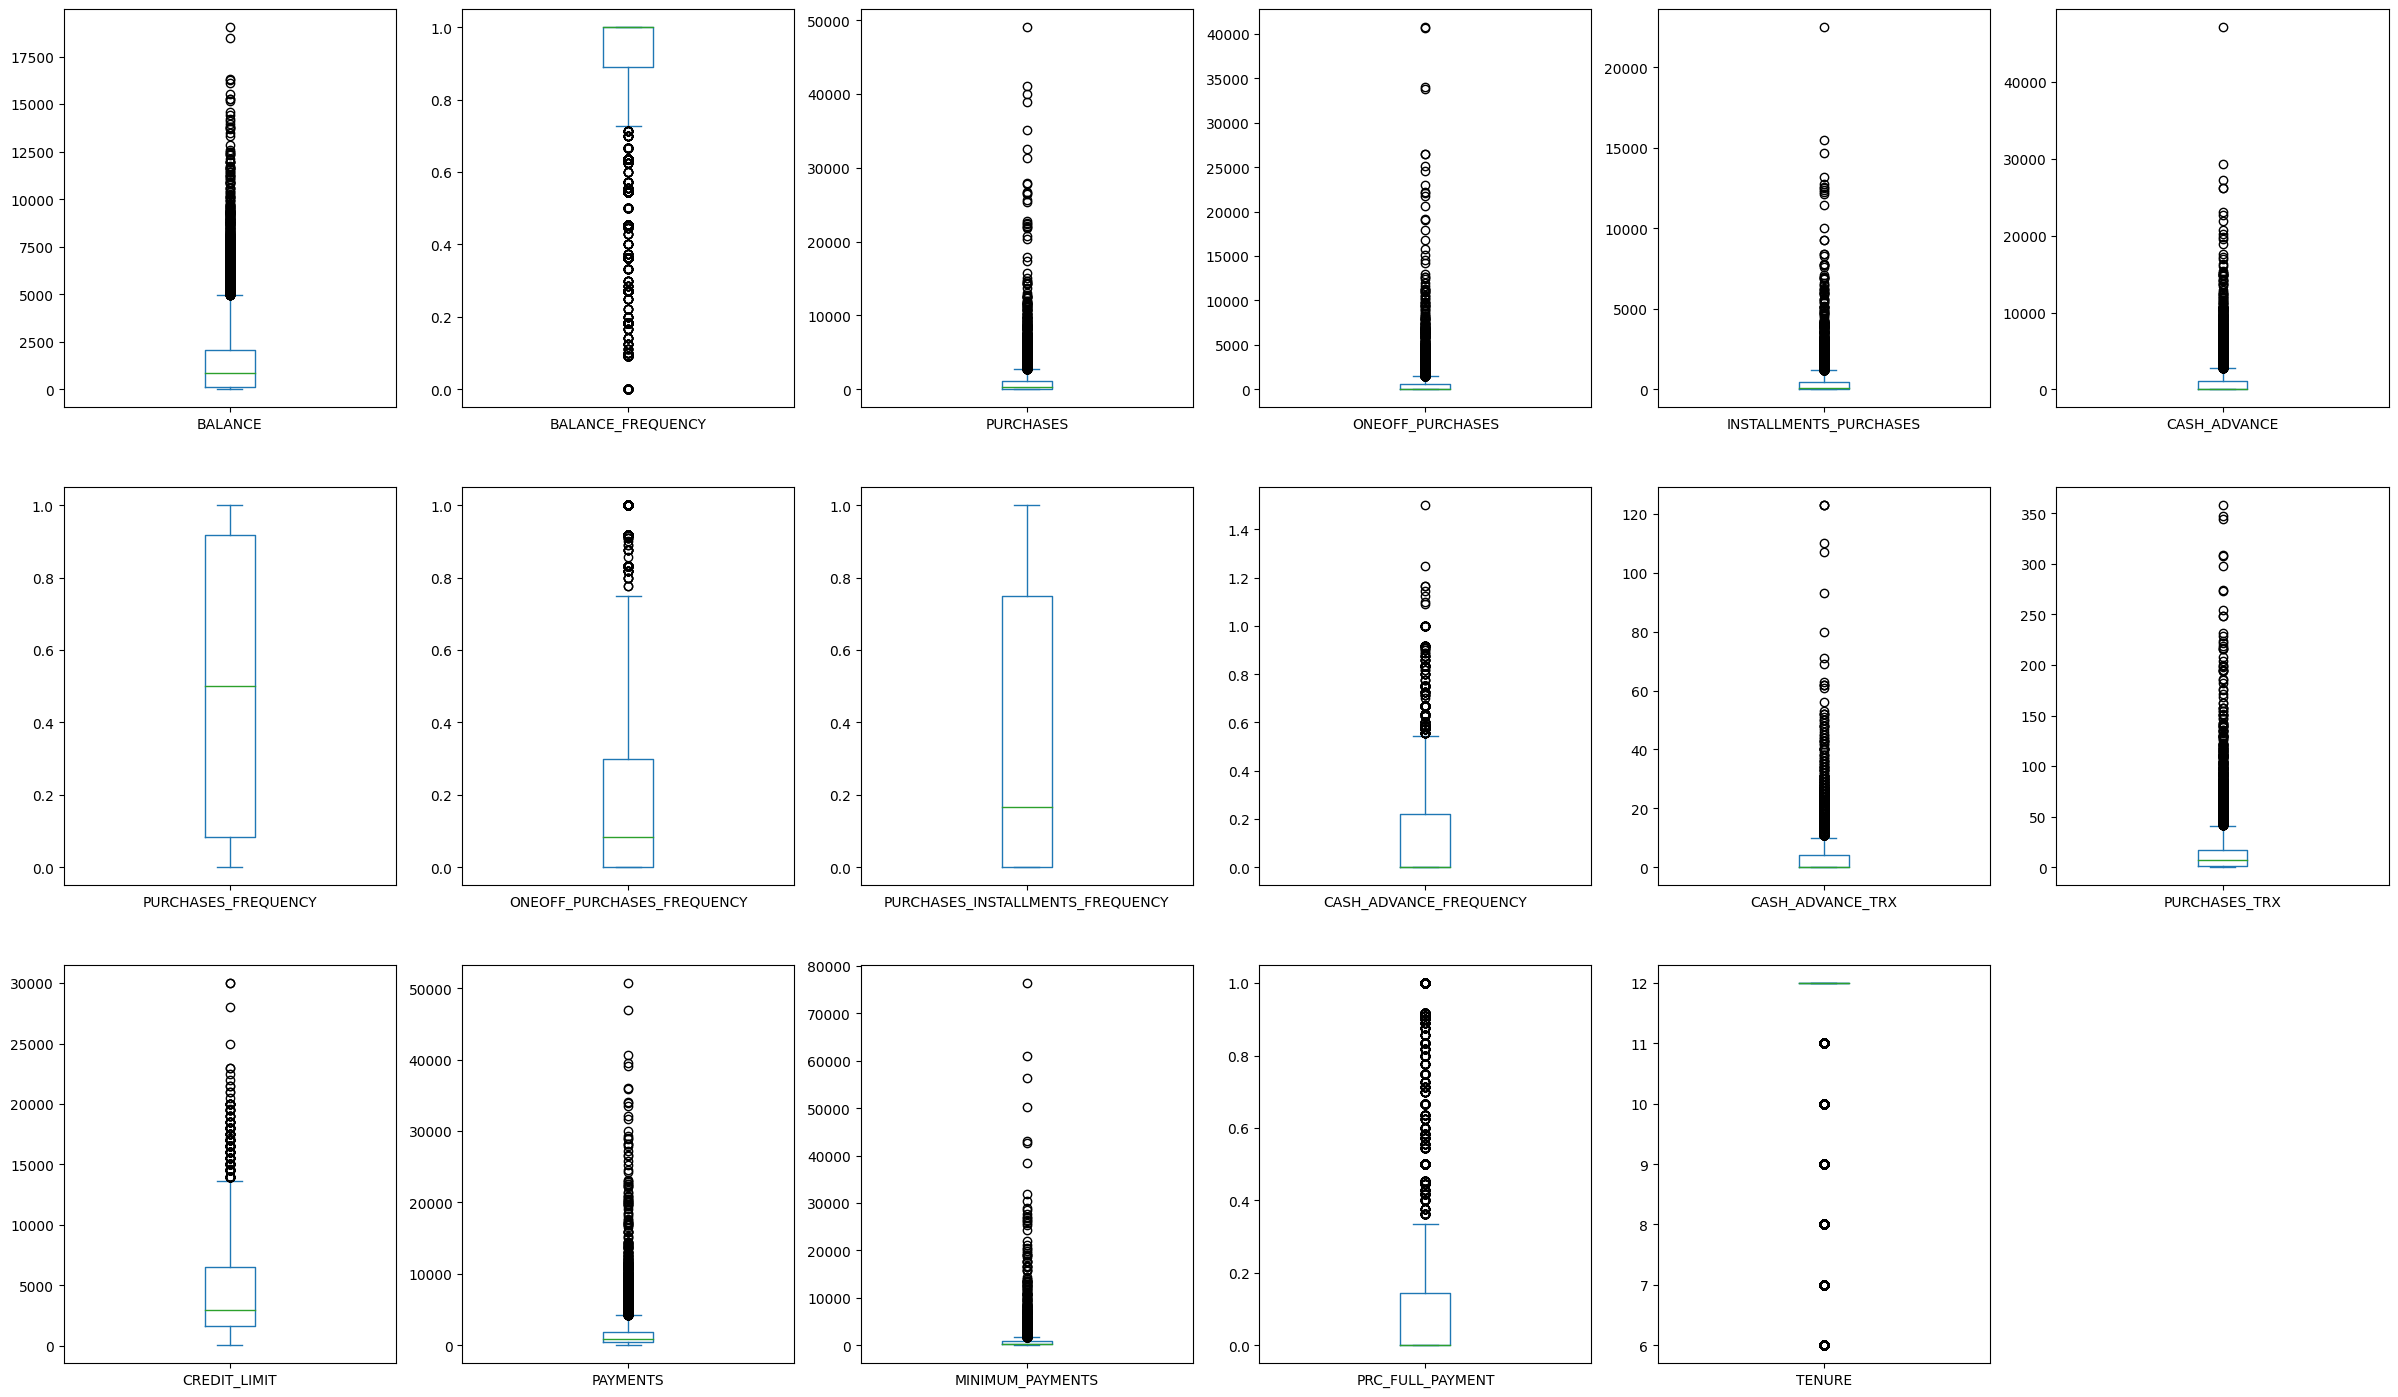

In [ ]:
numericdf.plot(kind="box",subplots=True, layout=(5,6),figsize=(30,30))

This code generates a box plot for each numeric feature in the dataset, allowing for a visual assessment of the distribution, central tendency, and presence of outliers across multiple variables simultaneously.

Outliers were observed in nearly all plots.








In [ ]:
numericdf.kurtosis()
#to understand how much of the data is in the extremes compared to a normal distribution
#The kurtosis values for the numerical features were calculated, providing insights into the tails of the distribution.

,0
BALANCE,7.674751
BALANCE_FREQUENCY,3.092370
PURCHASES,111.388771
ONEOFF_PURCHASES,164.187572
INSTALLMENTS_PURCHASES,96.575178
CASH_ADVANCE,52.899434
PURCHASES_FREQUENCY,-1.638631
ONEOFF_PURCHASES_FREQUENCY,1.161846
PURCHASES_INSTALLMENTS_FREQUENCY,-1.398632
CASH_ADVANCE_FREQUENCY,3.334734


# Kurtosis Observations

**BALANCE: 7.67**

High kurtosis: This indicates that there are a significant number of customers with very high balances compared to the average. This could imply that certain segments of customers are accumulating more debt, which may warrant targeted financial advice or interventions.

**PURCHASES: 111.39**

High kurtosis: This suggests that while many customers make average purchases, there are also many who make exceptionally high-value purchases. Marketing strategies could focus on rewarding these high-spending customers or exploring their purchasing habits to understand what drives their spending.

**ONEOFF_PURCHASES: 164.19**

Similarly, this value shows a strong presence of outliers, indicating that some customers frequently make large one-off purchases. Targeted campaigns can be developed to appeal to this group, potentially offering incentives for more of these transactions.

**INSTALLMENTS_PURCHASES: 96.58**

This suggests a considerable presence of customers who make substantial installment purchases. This could be an opportunity for marketing campaigns aimed at encouraging more installment-based purchasing, perhaps by promoting financing options.

**CASH_ADVANCE: 52.90**

This kurtosis value indicates some customers are using cash advances significantly more than others, which may highlight financial distress. Understanding this segment could help in providing tailored financial products or support.

**PURCHASES_FREQUENCY: -1.64**

The negative kurtosis here indicates a flat distribution with fewer outliers, suggesting that most customers make a relatively consistent number of purchases. This suggests that marketing strategies could be more generalized for this group.

**CREDIT_LIMIT: 2.84**

This value indicates a relatively normal distribution, meaning most customers have credit limits that are not excessively high or low. Marketing strategies can focus on understanding customer needs without targeting extreme segments.

**MINIMUM_PAYMENTS: 292.36**

This exceptionally high kurtosis suggests a significant number of customers are making very low minimum payments. This could point to a need for financial education or alerts regarding the implications of making low payments on their credit health.

In [ ]:
numericdf.skew()
# insight into how the data deviates from a normal distribution

,0
BALANCE,2.393386
BALANCE_FREQUENCY,-2.023266
PURCHASES,8.144269
ONEOFF_PURCHASES,10.045083
INSTALLMENTS_PURCHASES,7.299120
CASH_ADVANCE,5.166609
PURCHASES_FREQUENCY,0.060164
ONEOFF_PURCHASES_FREQUENCY,1.535613
PURCHASES_INSTALLMENTS_FREQUENCY,0.509201
CASH_ADVANCE_FREQUENCY,1.828686


Features with high positive skewness, such as PURCHASES, ONEOFF_PURCHASES, and MINIMUM_PAYMENTS, suggest that there are a few customers with very high activity levels, which may be crucial for targeted marketing strategies. Conversely, features like BALANCE_FREQUENCY and TENURE with negative skewness indicate a more uniform customer base, where most customers fall within a similar range. Understanding these patterns can guide the bank in tailoring its marketing strategies to meet the needs of different customer segments effectively.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

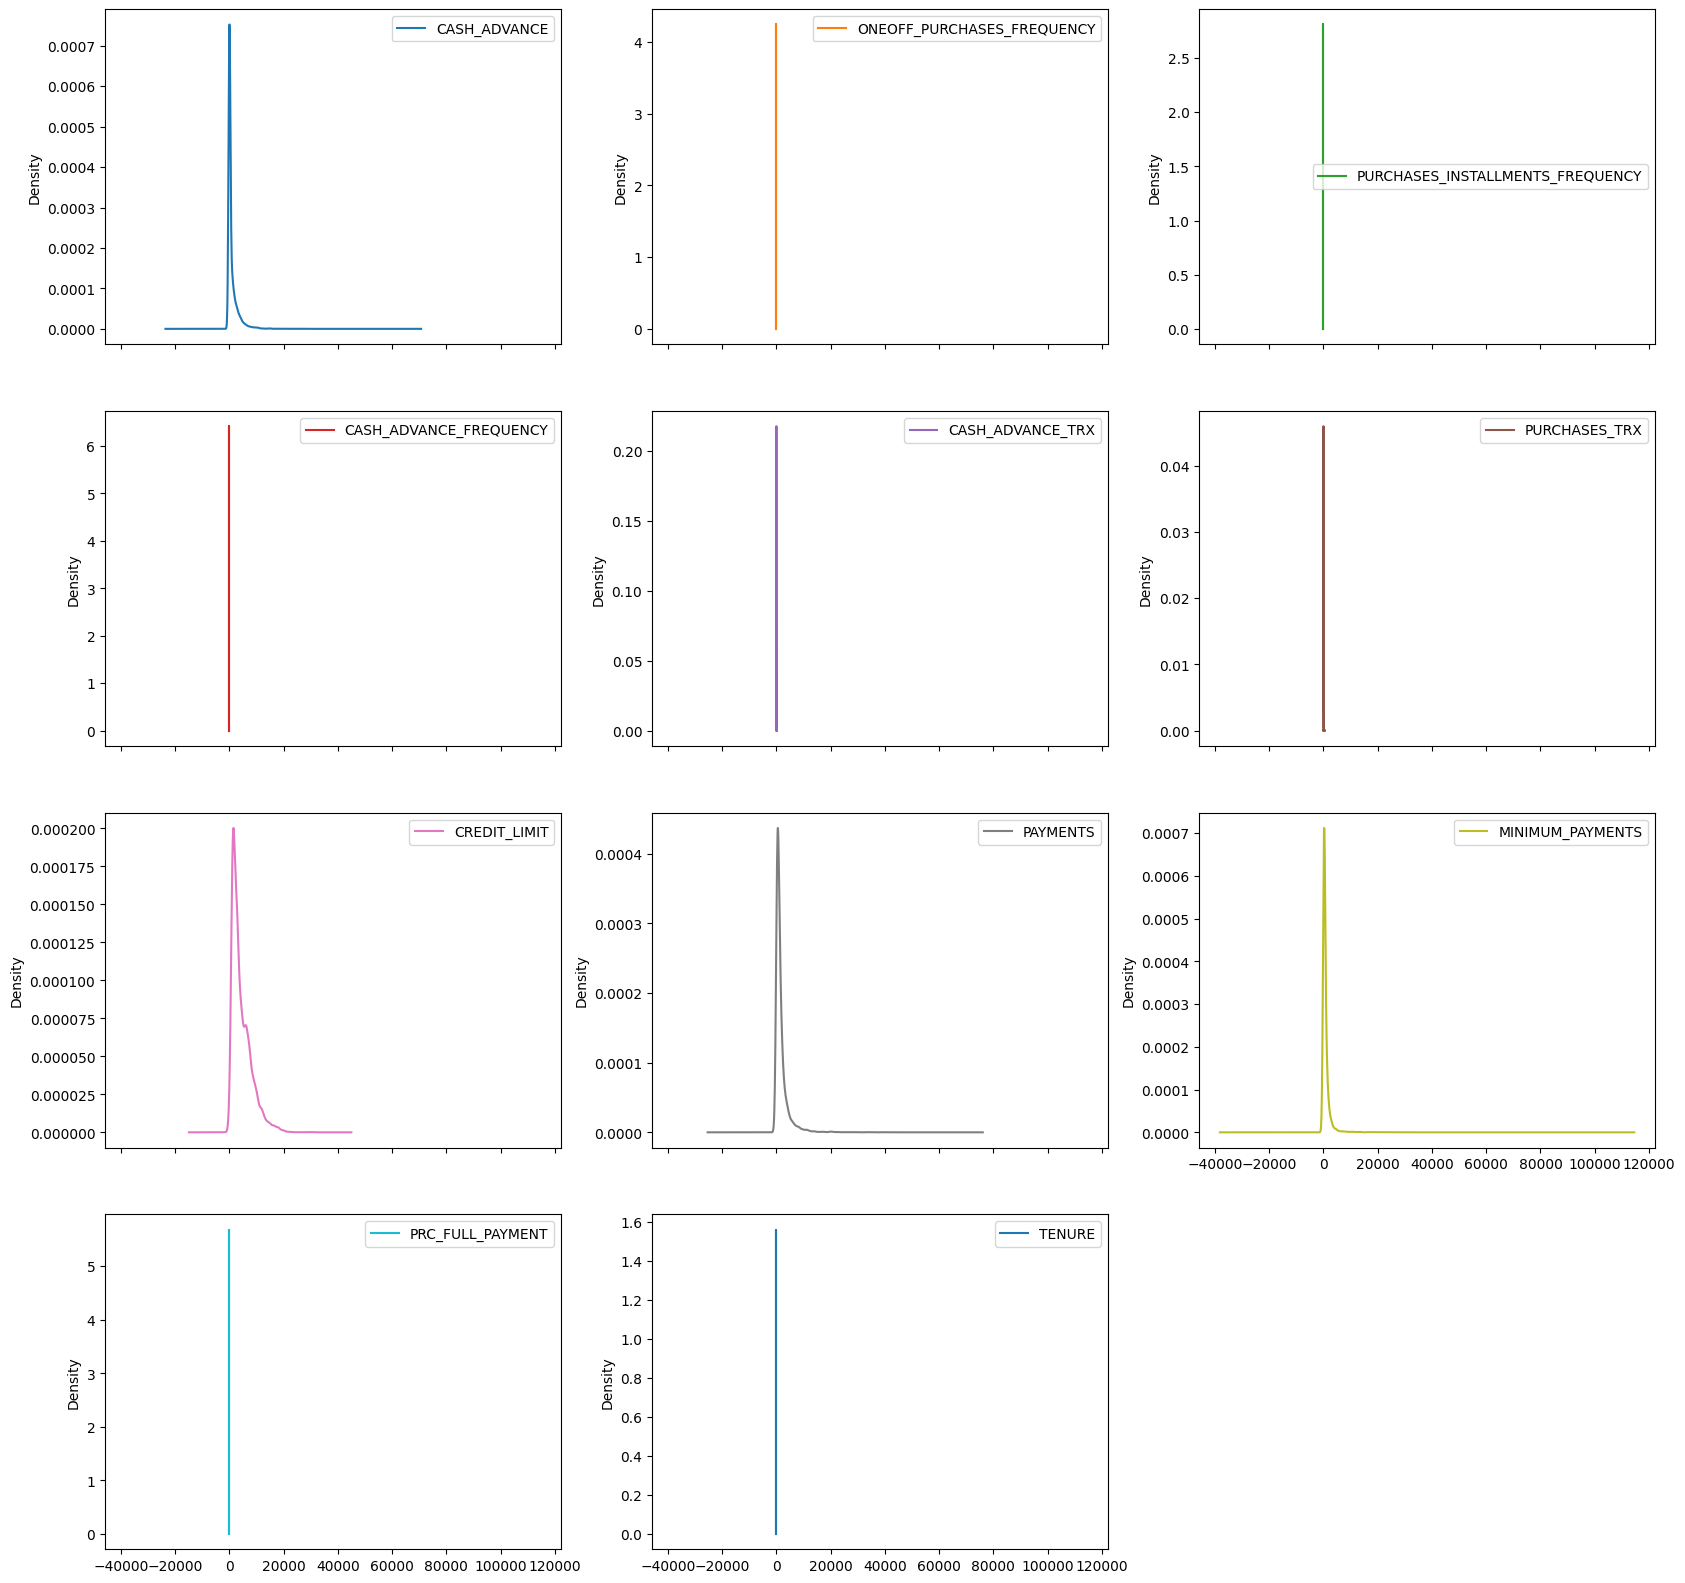

In [ ]:
numericdf2=numericdf.drop("BALANCE",axis=1)
numericdf3=numericdf2.drop(["PURCHASES","BALANCE_FREQUENCY","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY"],axis=1)
numericdf3.plot(kind='density',subplots=True,layout=(4,3),figsize=(20,20))
#This process involves removal of certain features followed by density plotting allows for a clearer understanding of the remaining variables.

# *OBSERVATION*

**CASH_ADVANCE:**

Skewness: Highly skewed to the right, indicating a small number of individuals with very high cash advances.

**ONEOFF_PURCHASES_FREQUENCY:**

Skewness: Perfectly Concentrated Data

**PURCHASES_INSTALLMENTS_FREQUENCY:**

Skewness: Perfectly Concentrated Data

**CASH_ADVANCE_FREQUENCY:**

Skewness: Perfectly Concentrated Data.

**CASH_ADVANCE_TRX:**

Skewness: Perfectly Concentrated Data

**PURCHASES_TRX:**

Skewness: Perfectly Concentrated Data

**CREDIT_LIMIT:**

Skewness: Moderately skewed to the right, indicating some individuals with higher credit limits.

**PAYMENTS:**

Skewness: Highly skewed to the left, indicating a small number of individuals with very low payment amounts.

**MINIMUM_PAYMENTS:**

Skewness: Highly skewed to the right, indicating a small number of individuals with very high minimum payment amounts.

**PRC_FULL_PAYMENT:**

Skewness: Perfectly Concentrated Data

**TENURE:**

Perfectly Concentrated Data

In [ ]:
numericdf4=df[["INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","MINIMUM_PAYMENTS","PAYMENTS"]]

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

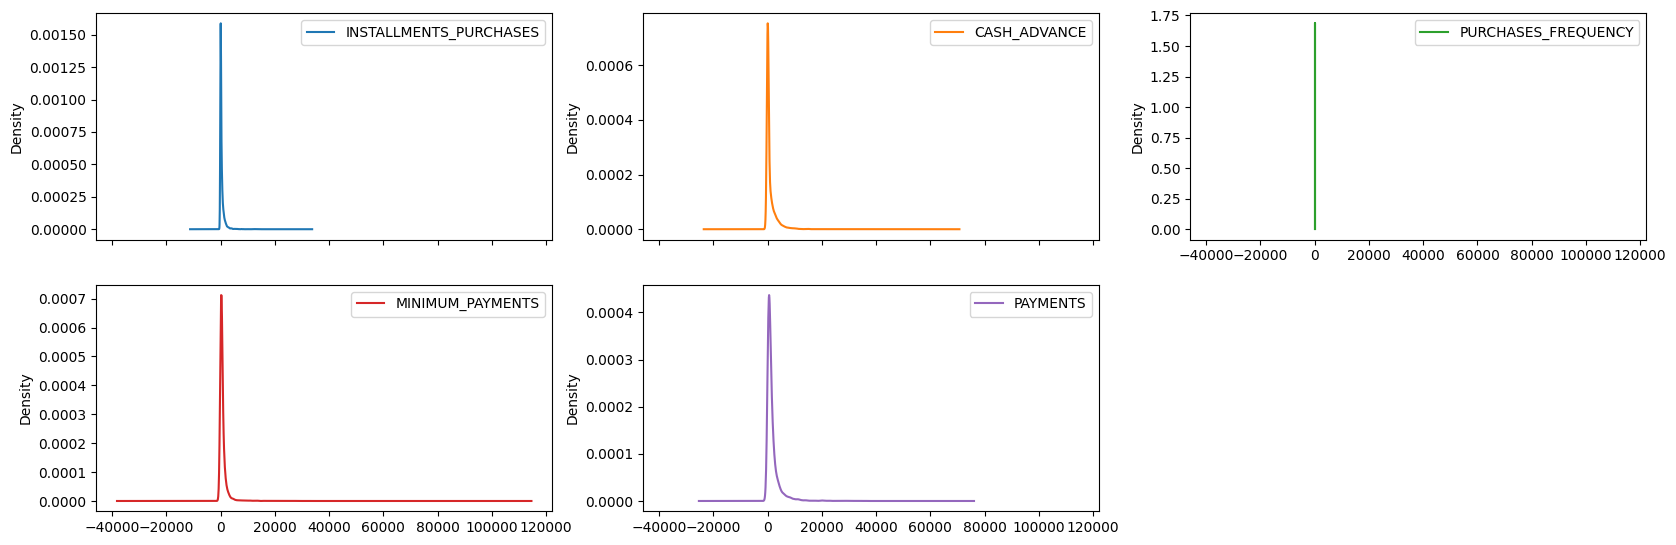

In [ ]:
numericdf4.plot(kind='density',subplots=True,layout=(3,3),figsize=(20,10))

#OBSERVATION

**INSTALLMENTS_PURCHASES:**

Skewness: Moderately skewed to the right, indicating a small number of individuals with high installment purchase amounts.

**CASH_ADVANCE:**

Skewness: Highly skewed to the right, indicating a small number of individuals with very high cash advance amounts.

**PURCHASES_FREQUENCY:**

Skewness: Perfectly Concentrated Data

**MINIMUM_PAYMENTS:**

Skewness: Highly skewed to the right, indicating a small number of individuals with very high minimum payment amounts.

**PAYMENTS:**

Skewness: Highly skewed to the right, indicating a small number of individuals with very high payment amounts.

<Axes: ylabel='Density'>

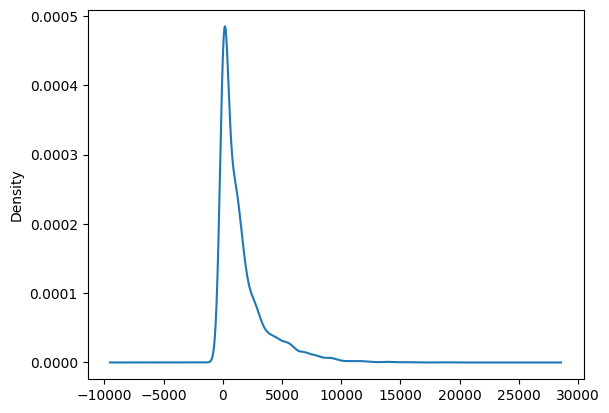

In [ ]:
df["BALANCE"].plot(kind="density")

Based on the provided density plot, we can draw the following inferences:

 Skewness: The plot is highly skewed to the right. This indicates that there is a tail of values that extend far to the right, suggesting that a small number of individuals or observations have very high values.

In [ ]:
#for a better normal distribution
from sklearn.preprocessing import PowerTransformer

# Using PowerTransformer with method 'yeo-johnson'
pt = PowerTransformer(method='yeo-johnson')
transformed_data_bc = pt.fit_transform(numericdf)

# Converting back to DataFrame
transformed_data_bc = pd.DataFrame(transformed_data_bc, columns=numericdf.columns)

# Checking the statistics of the transformed data
print(transformed_data_bc.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.950000e+03       8.950000e+03  8.950000e+03      8.950000e+03   
mean  -4.445854e-17      -4.699903e-16  1.238488e-16      6.986342e-17   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -2.120305e+00      -1.997716e+00 -1.505149e+00     -1.000488e+00   
25%   -8.168070e-01      -5.989922e-01 -6.547989e-01     -1.000488e+00   
50%    1.516813e-01       6.286119e-01  1.607696e-01      2.375163e-01   
75%    7.179130e-01       6.286119e-01  7.102506e-01      9.909450e-01   
max    2.731227e+00       6.286119e-01  3.559070e+00      1.959134e+00   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.950000e+03  8.950000e+03         8.950000e+03   
mean             7.343598e-17  1.381390e-16         6.668781e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -1.085422e+00 -9.445384e-01        -1.278866e

The PowerTransformer with the Yeo-Johnson method is used to make data more normally distributed, which is beneficial for many statistical and machine learning algorithms.

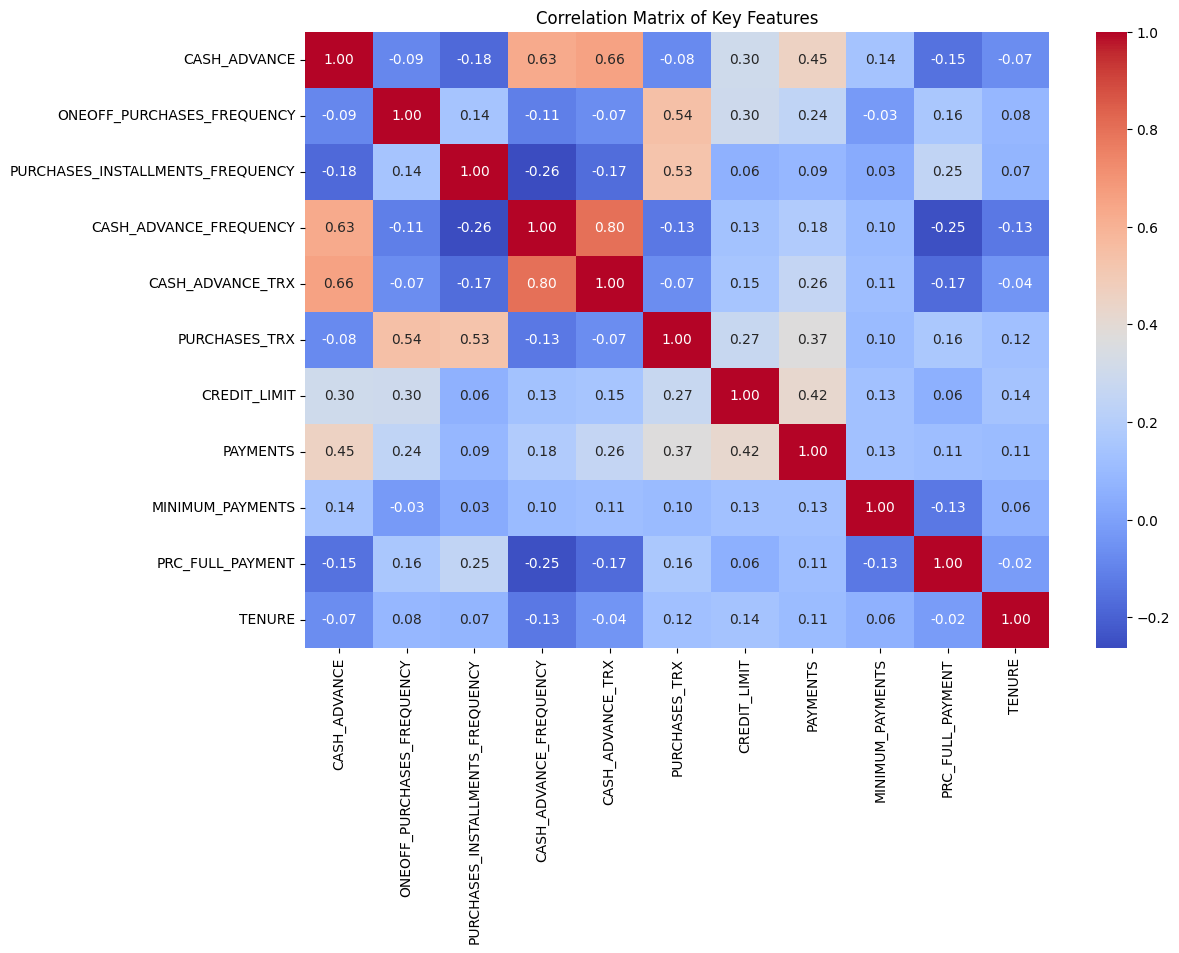

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(numericdf3.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix of Key Features")
plt.show()
#correlation heatmap to visualize the relationships between numerical features in the numericdf3 DataFrame

# Key Observations

**Strong Positive Correlations:**

1. CASH_ADVANCE and CASH_ADVANCE_FREQUENCY have a strong positive correlation (0.63), indicating that individuals who frequently use cash advances tend to have higher cash advance amounts.

2. CASH_ADVANCE and CASH_ADVANCE_TRX have a strong positive correlation (0.66), suggesting that individuals who use cash advances more frequently also tend to have more cash advance transactions.

3. CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX have a strong positive correlation (0.80), confirming the relationship between cash advance frequency and transaction count.

**Moderate Positive Correlations:**

1. PURCHASES_TRX and ONEOFF_PURCHASES_FREQUENCY have a moderate positive correlation (0.54), indicating that individuals who make more purchases are likely to have higher frequencies of one-off purchases.
2. PURCHASES_TRX and PURCHASES_INSTALLMENTS_FREQUENCY have a moderate positive correlation (0.53), suggesting that individuals who make more purchases are likely to have higher frequencies of installment purchases.

**Negative Correlations:**

1. PRC_FULL_PAYMENT and CASH_ADVANCE have a weak negative correlation (-0.15), suggesting that individuals who use cash advances more frequently may be less likely to make full payments.
2. PRC_FULL_PAYMENT and CASH_ADVANCE_FREQUENCY have a stronger negative correlation (-0.25), reinforcing the relationship between cash advance usage and reduced full payments.

**Additional Insights:**

1. CREDIT_LIMIT has moderate positive correlations with several variables, including PAYMENTS and PURCHASES_TRX, suggesting that individuals with higher credit limits tend to make larger payments and purchases.
2. TENURE has relatively weak correlations with most other variables, indicating that customer tenure may not be strongly related to other factors in this dataset.

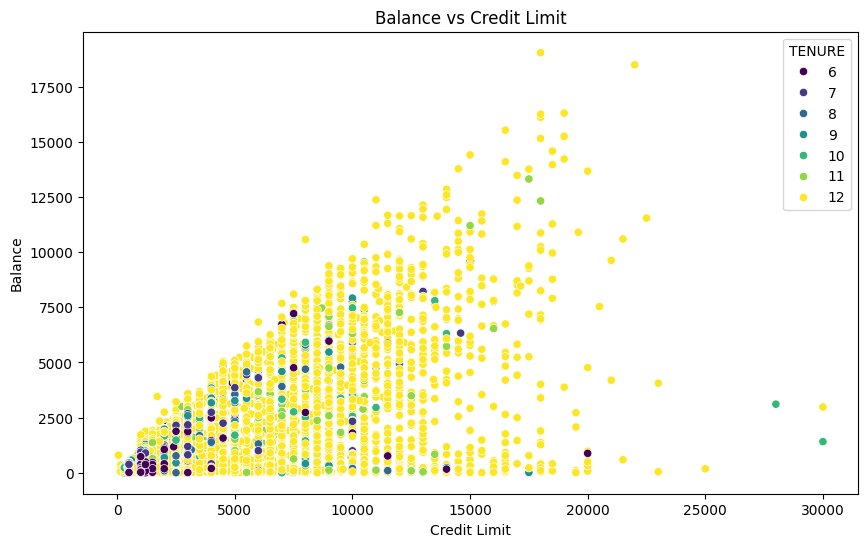

In [ ]:
#Using visualization to dive deeper into the dataset
# Balance vs Credit Limit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["CREDIT_LIMIT"], y=df["BALANCE"], hue=df["TENURE"], palette="viridis")
plt.title("Balance vs Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Balance")
plt.show()

# Key Observations


1. There appears to be a general positive correlation between balance and credit limit. This suggests that customers with higher credit limits tend to carry higher balances.
2. Customers with shorter tenures might have lower balances and credit limits
3. Tenure of 12 years is widely seen irrespective of the credit limit/ balance.

# Potential Interpretations

1. High-Spending Customers: Customers who have a high balance relative to their credit limit might be considered high-spending customers. These individuals may frequently use their credit cards for purchases and carry a significant amount of debt.
2. Responsible Payers: Customers with a low balance relative to their credit limit might be considered responsible payers. These individuals may pay off their balances in full each month and avoid carrying debt.
3. Credit Limit Utilization: The distribution of data points along the credit limit axis can provide insights into credit limit utilization. For example, a concentration of points near the maximum credit limit indicates high credit utilization rates.


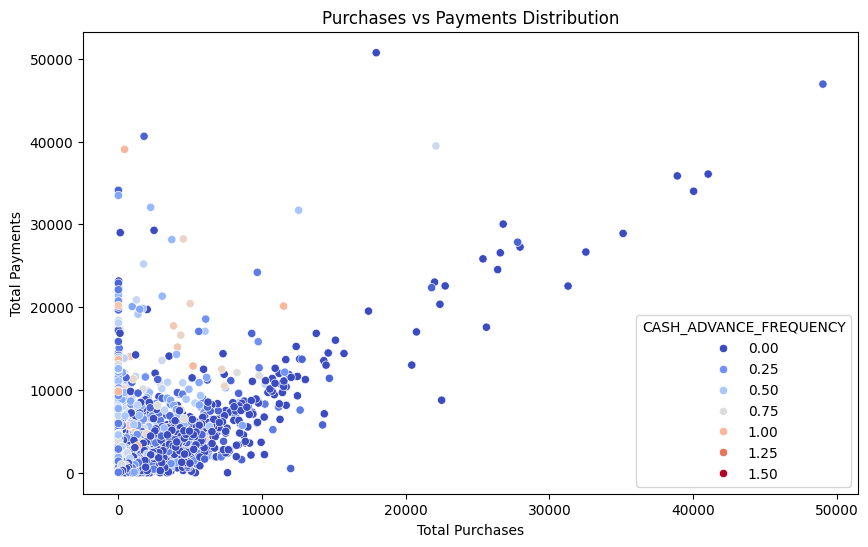

In [ ]:
# Distribution of Purchases vs Payments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PURCHASES"], y=df["PAYMENTS"], hue=df["CASH_ADVANCE_FREQUENCY"], palette="coolwarm")
plt.title("Purchases vs Payments Distribution")
plt.xlabel("Total Purchases")
plt.ylabel("Total Payments")
plt.show()

# Key Observations

1. Positive Correlation: There appears to be a general positive correlation between purchases and payments, suggesting that customers who make more purchases tend to make larger payments.
2. Customers with higher cash advance frequencies might have different spending and payment patterns compared to those with lower frequencies.

# Potential Interpretations

1. High-Spending Customers: Customers who have high total purchases and payments might be considered high-spending customers. These individuals may frequently use their credit cards for purchases and carry a significant amount of debt.
2. Responsible Payers: Customers who have a relatively low balance relative to their credit limit might be considered responsible payers. These individuals may pay off their balances in full each month and avoid carrying debt.

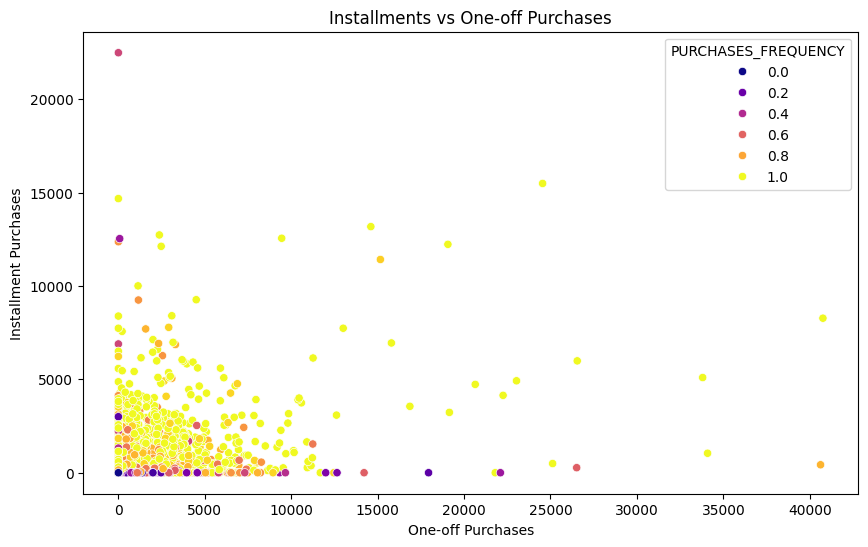

In [ ]:
# Installments Purchases vs One-off Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["PURCHASES_FREQUENCY"], palette="plasma")
plt.title("Installments vs One-off Purchases")
plt.xlabel("One-off Purchases")
plt.ylabel("Installment Purchases")
plt.show()

# Key Observations

1. Negative Correlation: There appears to be a negative correlation between installment purchases and one-off purchases, suggesting that customers who tend to make more installment purchases might make fewer one-off purchases.
2. Customers with higher purchase frequencies might have different combinations of installment and one-off purchases.

# Potential Interpretations

1. Installment-Focused Customers: Customers who have high installment purchases and low one-off purchases might be considered installment-focused customers. These individuals may prefer to spread their payments over time.
2. One-Off Purchasers: Customers who have high one-off purchases and low installment purchases might be considered one-off purchasers. These individuals may prefer to make larger, single payments for their purchases.
3. Balanced Spenders: Customers who have a relatively balanced mix of installment and one-off purchases might be considered balanced spenders. These individuals may use both payment methods depending on their needs.

In [ ]:
# Applying log transformation or Box-Cox to handle outliers and skewness
transformed_data_bc = numericdf.apply(lambda x: np.log(x + 1))

# Now, I will proceed with scaling the transformed data
ds = df.copy()
cols_del = ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'TENURE','CUST_ID']
ds = ds.drop(cols_del, axis=1)

# Using the transformed data
scaler = StandardScaler()
scaler.fit(transformed_data_bc)  # using transformed_data_bc for scaling
scaled_ds = pd.DataFrame(scaler.transform(transformed_data_bc), columns=transformed_data_bc.columns)
scaled_ds.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-1.447163,-0.824484,-0.481957,-0.556368,0.347262
1,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.926060,1.065033,0.791014,0.391958,0.347262
2,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,1.010229,-0.119300,0.455727,-0.556368,0.347262
3,0.624653,-0.857867,0.827499,1.265778,-1.087454,0.564372,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,1.010229,-4.161996,-3.578076,-0.556368,0.347262
4,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.224909,-0.064979,-0.131852,-0.556368,0.347262


In [ ]:
pca = PCA(n_components=4)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds), columns=(['col1','col2','col3','col4']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8950.0,8.574147e-17,2.413462,-5.354254,-2.279734,0.405577,1.927173,5.693129
col2,8950.0,-6.351220e-17,1.956237,-6.974442,-1.141308,0.100909,1.270306,6.642279
col3,8950.0,2.540488e-17,1.271671,-3.202348,-0.789059,-0.125654,0.895726,3.672961
col4,8950.0,3.810732e-17,1.135795,-5.918301,-0.513210,0.199843,0.737484,2.887738


In this step, PCA is applied to reduce the dimensionality of the dataset scaled_ds to four principal components. The transformed data is stored in a new DataFrame PCA_ds with columns labeled 'col1', 'col2', 'col3', and 'col4' because choosing four components in PCA is often done to retain the most significant variance in the data while reducing dimensionality.

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


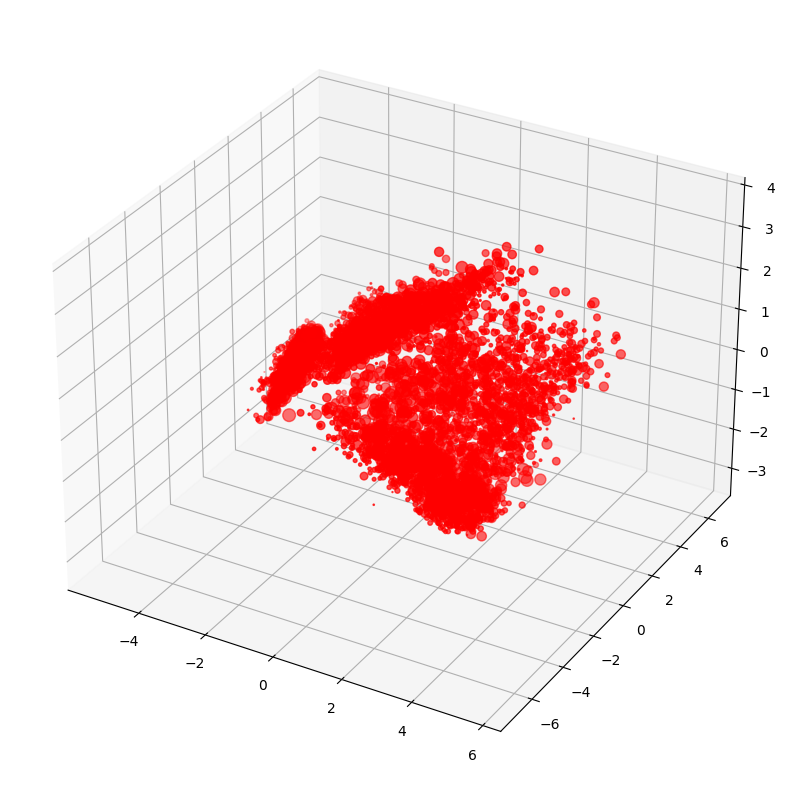

In [ ]:
#creating a 3D scatter plot to visualize the first four principal components obtained from PCA.
x=PCA_ds['col1']
y=PCA_ds['col2']
z=PCA_ds['col3']
t=PCA_ds['col4']

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax=ax.scatter(x,y,z,s=t*40,c='red', marker='o')
plt.show()

This 3D PCA scatter plot provides preliminary view of the data distribution in the reduced dimensional space spanned by the first four principal components.

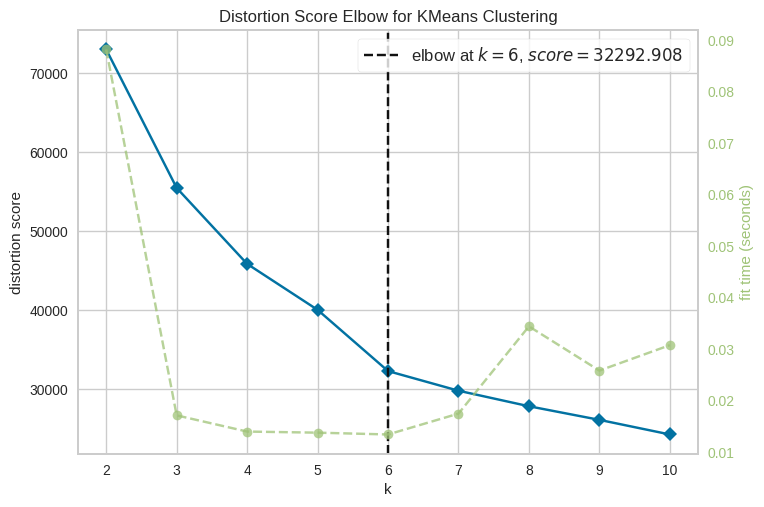

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#utilizing the Yellowbrick library to visualize the elbow method for determining the optimal number of clusters in a K-Means clustering context.
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

# Key Observations

Elbow Point: The plot shows an "elbow" at k=6, indicating that the distortion score decreases significantly from k=5 to k=6 but then starts to plateau. This suggests that adding more clusters beyond 6 might not provide a significant improvement in the clustering quality.

In [ ]:
# Performing K-Means clustering (k=6)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_ds)

In [ ]:
# Evaluating K-Means using silhouette score
kmeans_silhouette = silhouette_score(scaled_ds, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.1778678375607783


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
# Performing DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan_labels = dbscan.fit_predict(scaled_ds)

# Evaluating DBSCAN using silhouette score
# Filtering out noise points for silhouette score
dbscan_silhouette = silhouette_score(scaled_ds[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: -0.05136925428180824


In [ ]:
# Compare and pick the best algorithm
if kmeans_silhouette > dbscan_silhouette:
    print("K-Means performed better.")
    final_labels = kmeans_labels
    algorithm = "K-Means"
else:
    print("DBSCAN performed better.")
    final_labels = dbscan_labels
    algorithm = "DBSCAN"

K-Means performed better.


Thus we will use K-Means for further processes.

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


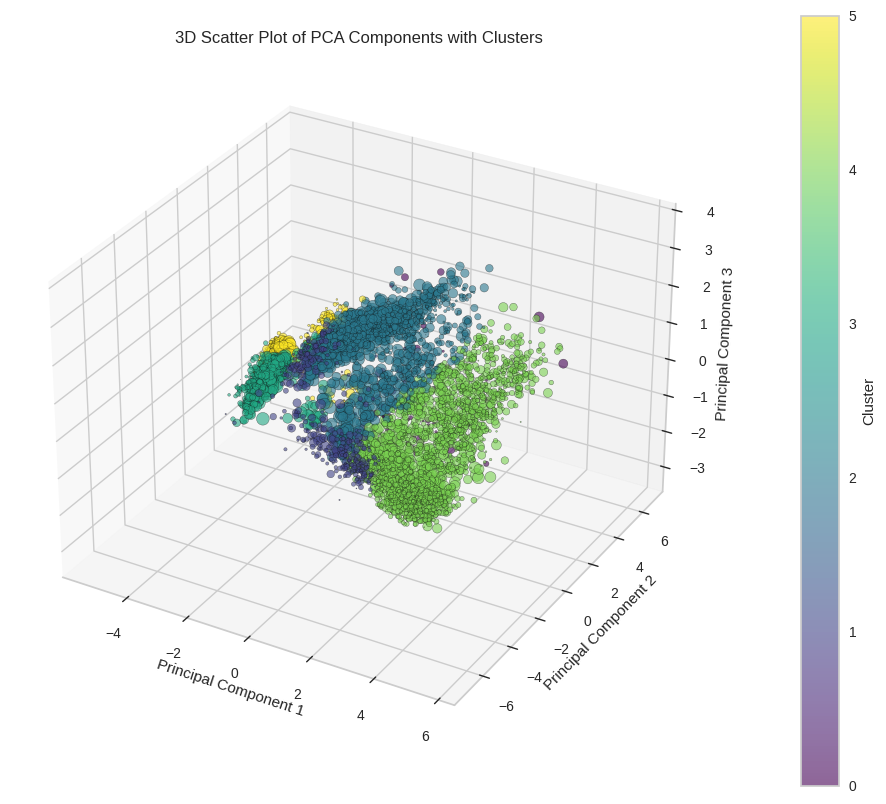

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Applying PCA
pca = PCA(n_components=4)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=['col1', 'col2', 'col3', 'col4'])

PCA_ds['Cluster'] = kmeans_labels

# Creating a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster labels
scatter = ax.scatter(
    PCA_ds['col1'],
    PCA_ds['col2'],
    PCA_ds['col3'],
    c=PCA_ds['Cluster'],
    s=PCA_ds['col4'] * 40,  # Size based on the fourth component
    cmap='viridis',  # Color map for better visualization
    alpha=0.6,
    edgecolor='k'
)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components with Clusters')

# Create a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.show()


# Inferences

1. Cluster Structure: The plot suggests that the data can be reasonably divided into distinct clusters. However, there might be some overlap between clusters, indicating that the boundaries between groups are not perfectly clear-cut.
2. Principal Component Importance: The visualization suggests that the two (Cluster 2 and 4) principal components capture a significant amount of variation in the data, as the spread of the data points is more pronounced along these axes.

Thus we will perform further operations to come to a final conclusion.

In [ ]:
#calculating percentage of customers in each cluster
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()

# Calculate the percentage of each cluster
cluster_percentage = (cluster_counts / cluster_counts.sum()) * 100

# Create a DataFrame for better visualization
cluster_summary = pd.DataFrame({
    'Customer Count': cluster_counts,
    'Percentage': cluster_percentage
})

print(cluster_summary)


   Customer Count  Percentage
0            1306   14.592179
1            1020   11.396648
2            1433   16.011173
3            1427   15.944134
4            2719   30.379888
5            1045   11.675978


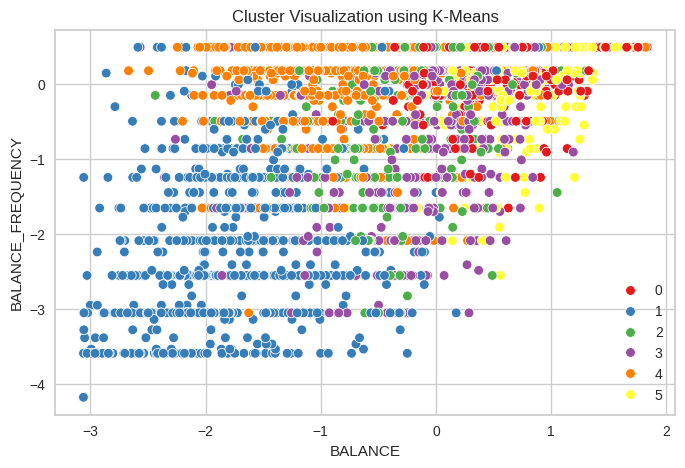

In [ ]:
# Visualizing clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_ds.iloc[:, 0], y=scaled_ds.iloc[:, 1], hue=final_labels, palette='Set1', legend='full')
plt.title(f'Cluster Visualization using {algorithm}')
plt.show()

# Key Observations

1. Cluster Separation: The clusters appear to be reasonably well-separated, suggesting that the K-Means algorithm has effectively identified distinct groups within the data.
2. Cluster Density: Some clusters have higher densities of data points than others, indicating that certain groups are more concentrated in specific regions of the feature space.

# INFERENCES

1. Cluster 0 might represent a segment of customers who are high-spending, frequent users.
2. Cluster 1 might represent a segment of customers who are low-engagement, infrequent users.
3. Cluster 2 might represent a segment of customers who are moderate users. They have a balanced approach to credit card usage, with neither excessively high nor excessively low balances or frequencies.
4. Cluster 3 might represent a segment of customers who are general-purpose users. They have a balanced approach to credit card usage, utilizing their cards for various purchases without excessive spending or infrequent use.
5. Cluster 4 might represent a segment of customers who are occasional users. They may have limited credit card usage and primarily use their cards for specific purchases or emergencies.
6. Cluster 5 might represent a segment of customers who are moderate-to-high spenders with frequent usage. They have a good balance between spending and usage, making them valuable customers for the bank.



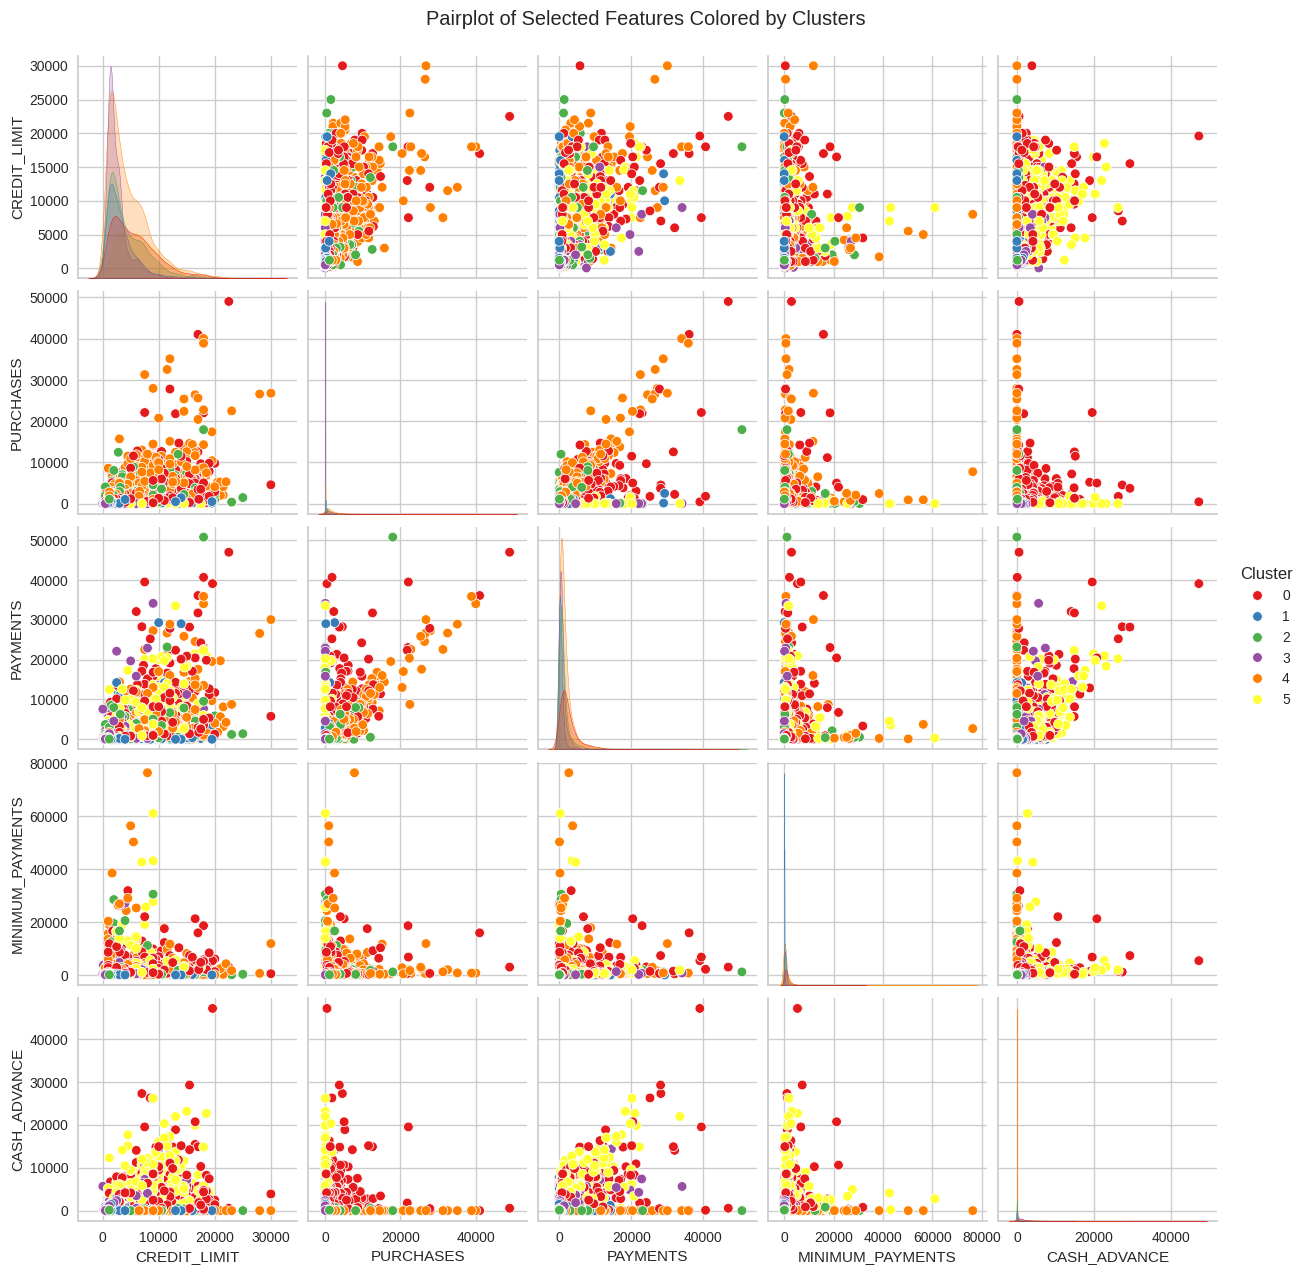

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new DataFrame that includes the cluster labels from the best-performing algorithm
df_clustered = df.copy()
df_clustered['Cluster'] = kmeans.labels_  #K-Means is better

# Select the features that are important for customer segmentation
selected_features = ['CREDIT_LIMIT', 'PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE']

# Pairplot to visualize clusters in different feature dimensions
sns.pairplot(df_clustered[selected_features + ['Cluster']], hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features Colored by Clusters', y=1.02)
plt.show()

# Cluster Analysis

1. Cluster 0: High-Spending Customers

High Credit Limit: Customers in this cluster typically have higher credit limits, indicating a greater financial capacity.

High Spending: They likely make frequent and larger purchases, as evidenced by their high credit limit utilization and potential for higher balances.

Cash Advance Usage: This cluster might have a higher propensity for using cash advances, suggesting a need for short-term liquidity.

2. Cluster 1: Low-Engagement Customers

Low Credit Limit: Customers in this cluster may have lower credit limits, indicating a more limited financial capacity or a preference for lower-risk credit usage.

Less Purchases and Payments: They likely make fewer purchases and have lower payment amounts, suggesting infrequent or minimal credit card usage.

3. Cluster 2: Credit-Conscious Customers

Decent Credit Limit: Customers in this cluster might have a reasonable credit limit, indicating a moderate level of financial capacity.

Less Purchases: They may make fewer purchases or smaller-value purchases compared to other clusters.

Avoids Cash Advances: This cluster might have a lower propensity for using cash advances, suggesting a more cautious approach to credit usage.

4. Cluster 3: Balanced Customers

Decent Credit Limit: Customers in this cluster likely have a reasonable credit limit, indicating a moderate level of financial capacity.

Decent Purchases: They might make a balanced amount of purchases, neither excessive nor minimal.

Consistent Usage: This cluster could represent customers who use their credit cards consistently for everyday purchases.

5. Cluster 4: Occasional Users

Credit Limit: Moderate to low credit limit, indicating a limited financial capacity or a preference for lower-risk credit usage.

Usage Patterns: Infrequent or sporadic credit card usage, with periods of inactivity followed by occasional purchases.

Spending Habits: Relatively low overall spending compared to other clusters, suggesting a more cautious or limited approach to credit card expenditures.

6. Cluster 5: High-Value Customers

Moderate to High Credit Limit: Customers in this cluster might have a higher credit limit, indicating a greater financial capacity.

Optimal Usage: They may effectively utilize their credit limit, making purchases that align with their financial capabilities and avoiding excessive debt.

Value-Driven: This cluster could represent customers who are more value-conscious and make informed purchasing decisions.

<ipython-input-34-11c36c8fb4cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df_clustered, palette='Set1')
<ipython-input-34-11c36c8fb4cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df_clustered, palette='Set1')
<ipython-input-34-11c36c8fb4cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df_clustered, palette='Set1')
<ipython-input-34-11c36c8fb4cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

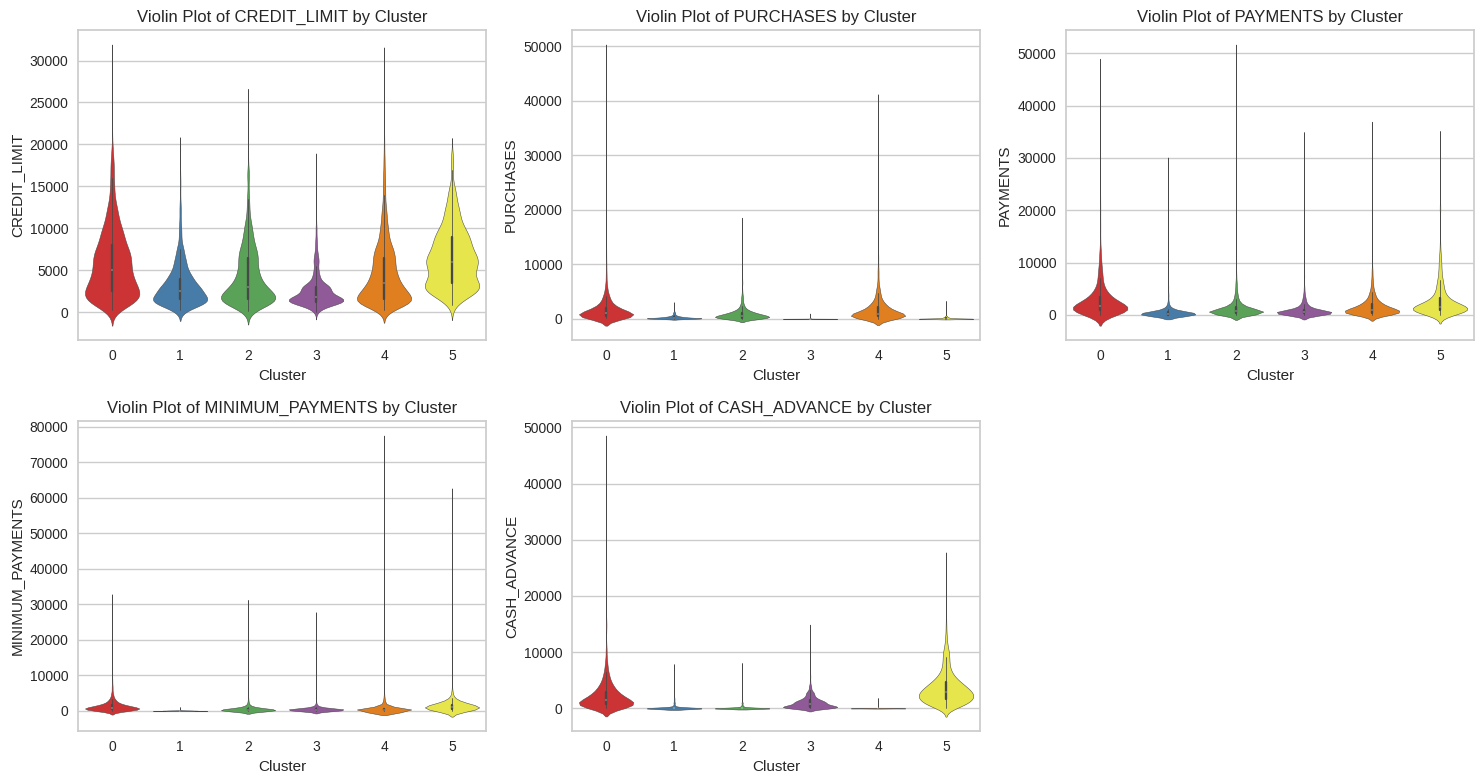

In [ ]:
# Violin plots for each feature to understand distribution within clusters
plt.figure(figsize=(15, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Cluster', y=feature, data=df_clustered, palette='Set1')
    plt.title(f'Violin Plot of {feature} by Cluster')

plt.tight_layout()
plt.show()

# Key Observations

1. Cluster 3 has least median credit limit.
2. Cluster 0 and 4 have better purchase rates.
3. Payments median in decent for all clsuters.
4. Minimum payments and cash advance for better in Cluster 0 and 5.

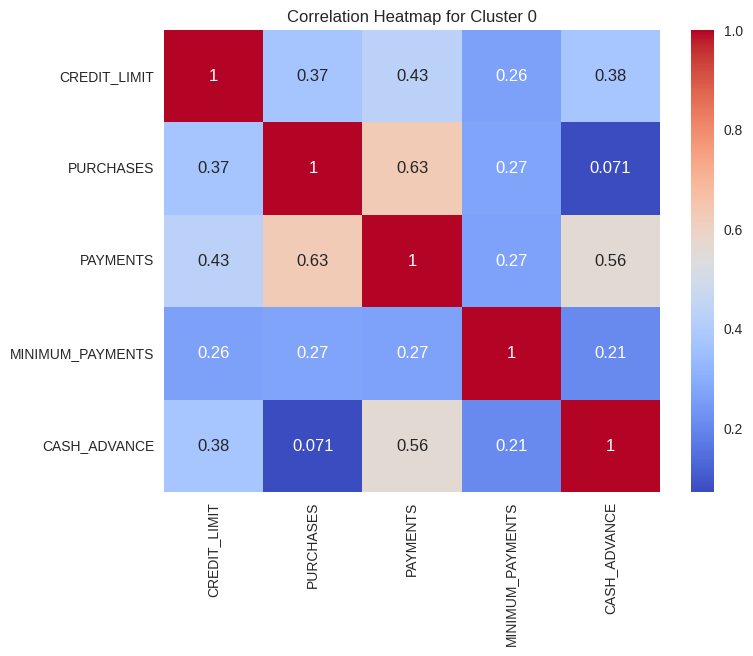

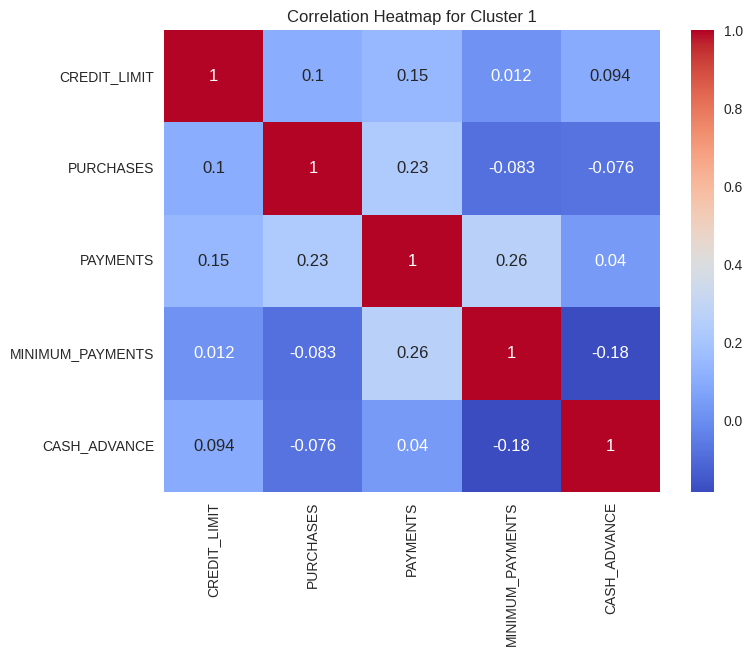

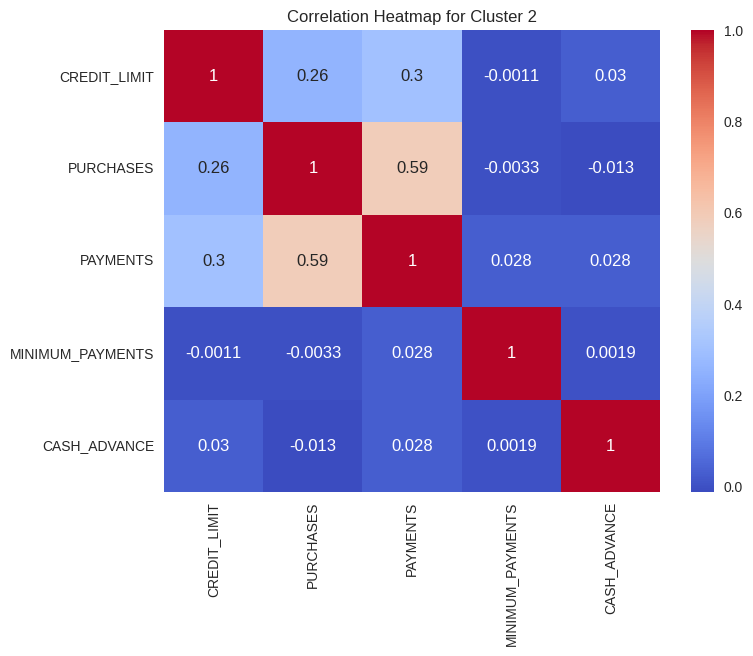

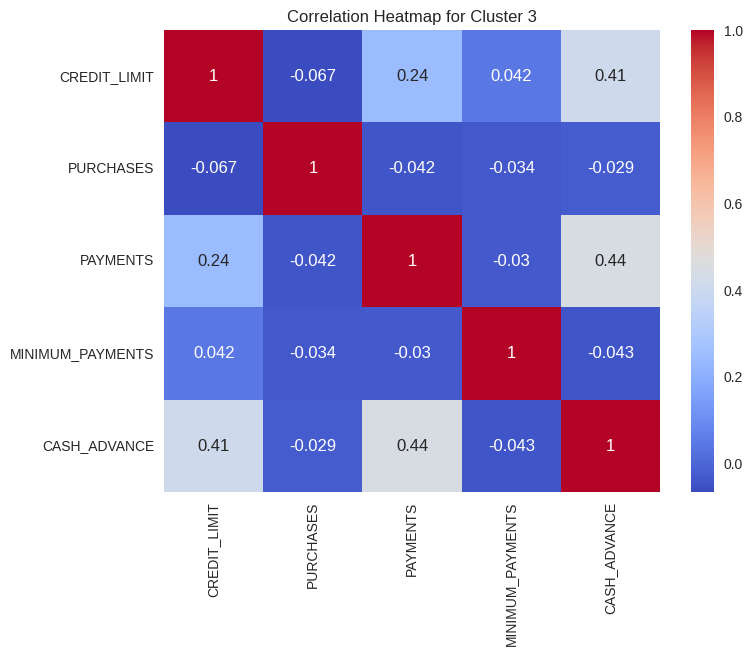

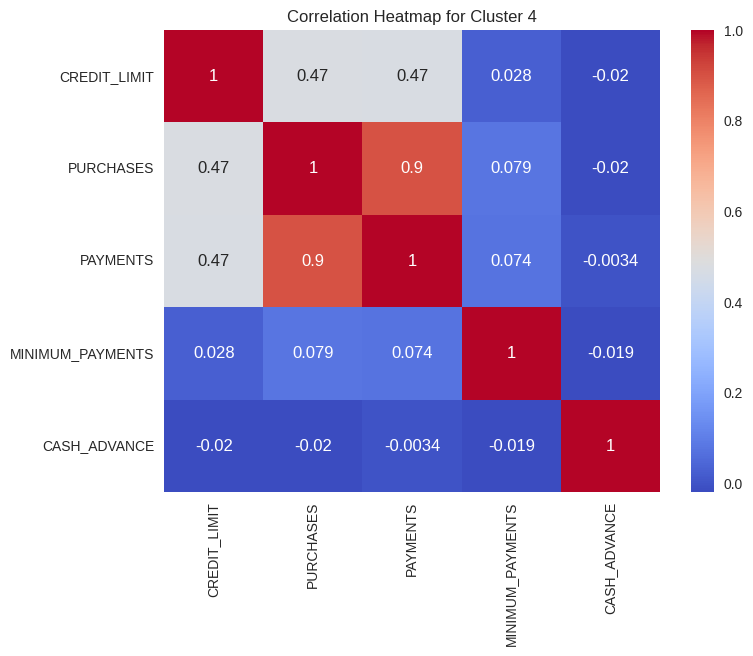

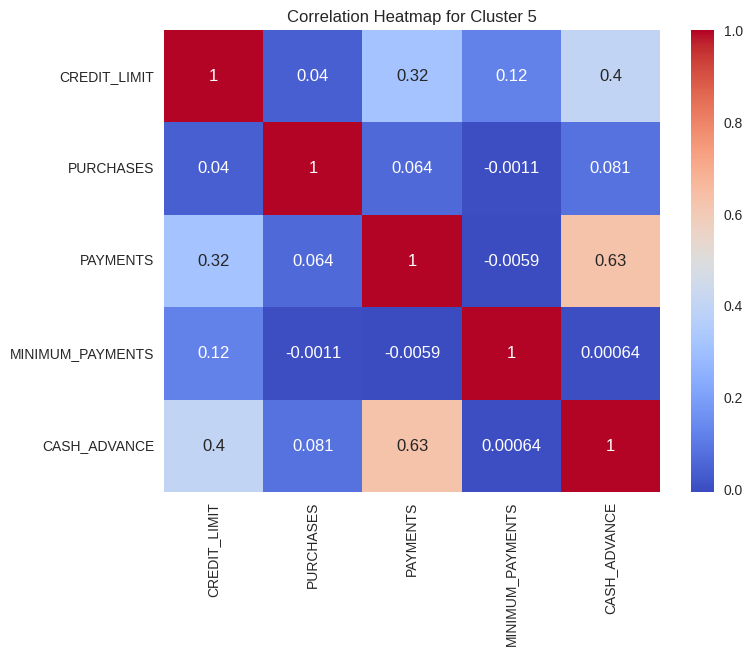

In [ ]:
# Generate a correlation heatmap for each cluster
for cluster in range(kmeans.n_clusters):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_clustered[df_clustered['Cluster'] == cluster][selected_features].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for Cluster {cluster}')
    plt.show()

Similar inferences can be drwan from correlation map too, thus leading us to the final profiles of customers.

# ***Customer Profiles and Marketing Strategies***

# 1. **Cluster 0: High-Spending Customers**
**Profile:**

* High credit limits and frequent, large purchases.

* Higher propensity for using cash advances, indicating a need for short-term liquidity.

**Marketing Strategy:**

* Offer Premium Rewards Programs: Introduce exclusive cashback or rewards programs for high-spending categories (e.g., travel, luxury shopping).
* Provide Short-Term Loan Offers: Given their tendency to use cash advances, offer personalized short-term loan options with lower interest rates.
* Exclusive Access: Offer VIP access to events, airport lounges, or premium travel benefits.
* Credit Limit Increase Campaigns: Encourage them to increase their credit limits, as they have the spending power.

# 2. **Cluster 1: Low-Engagement Customers**
**Profile:**
* Low credit limits and infrequent or minimal credit card usage.

**Marketing Strategy:**
* Encourage Usage through Cashback: Offer cashback or discounts on essential purchases like groceries or fuel to incentivize more frequent use.
* Introduce No-Annual Fee Options: Promote cards with no annual fees to encourage retention.
* Send Reminders and Tips: Regularly remind them of the benefits of using their credit card through educational content (e.g., building credit scores, rewards accumulation).

# 3. **Cluster 2: Credit-Conscious Customers**
**Profile:**
* Moderate credit limits and a cautious approach to credit usage.
* Avoids cash advances, indicating responsible financial behavior.

**Marketing Strategy:**
* Offer Low-Interest Rates or Balance Transfer Options: Provide balance transfer offers with lower interest rates for those who want to manage their finances better.
* Financial Planning Tools: Provide them with budgeting tools, credit score monitoring, and financial planning advice as they appreciate financial consciousness.
* Targeted Upsell Offers: Introduce rewards or incentives for using their card in specific spending categories that align with their lifestyle (e.g., dining, travel).

# 4. **Cluster 3: Balanced Customers**
**Profile:**
* Moderate credit limits with consistent, everyday usage.
* Use credit cards for a variety of purchases without excessive spending.

**Marketing Strategy:**
* Loyalty Programs: Offer loyalty points that can be redeemed for everyday purchases, making the card more appealing for routine transactions.
* Seasonal Promotions: Promote seasonal offers (e.g., holiday shopping discounts, dining cashback) to maintain engagement.
* Encourage Card Usage Across Categories: Provide incentives for using the card across different categories to ensure continued balanced usage.

# 5. **Cluster 4: Occasional Users**
**Profile:**
* Moderate to low credit limits with infrequent or sporadic usage.
* Likely to use their card for specific purchases or emergencies.
* Also the largest cluster/customer group.

**Marketing Strategy:**
* Activation Campaigns: Offer one-time discounts or cashback on the next transaction to encourage more frequent card use.
* Provide Emergency Credit Line: Offer an emergency credit line that they can use during specific situations, which might increase their usage.
* Educate on Benefits: Share educational content about the advantages of regular card usage, such as building a credit history.

# 6. **Cluster 5: High-Value Customers**
**Profile:**
* Moderate to high credit limits with optimal and frequent usage.
* Value-conscious and makes informed purchasing decisions.

**Marketing Strategy:**
* Exclusive Partnerships: Offer co-branded cards with partners that align with their spending habits (e.g., travel, luxury shopping, dining).
* Tiered Reward System: Introduce a tiered reward system where the more they spend, the better the rewards, incentivizing higher usage.
* Personalized Offers: Use their transaction history to send personalized offers on products and services they are likely to value.

# **General Observations and Recommendations**
* Cross-Selling Opportunities: Use insights from these clusters to cross-sell products like personal loans, insurance, or investment plans to high-spending and high-value customers.
* Retention Campaigns: Implement retention campaigns for low-engagement and occasional users to maintain their connection with the bank.
* Feedback Mechanism: Create a feedback loop where you regularly gather insights from each cluster to improve services and tailor marketing strategies.


These marketing strategies are tailored to leverage the transaction and credit usage patterns you've identified in each cluster, ensuring that each segment receives personalized and effective engagement from the bank.

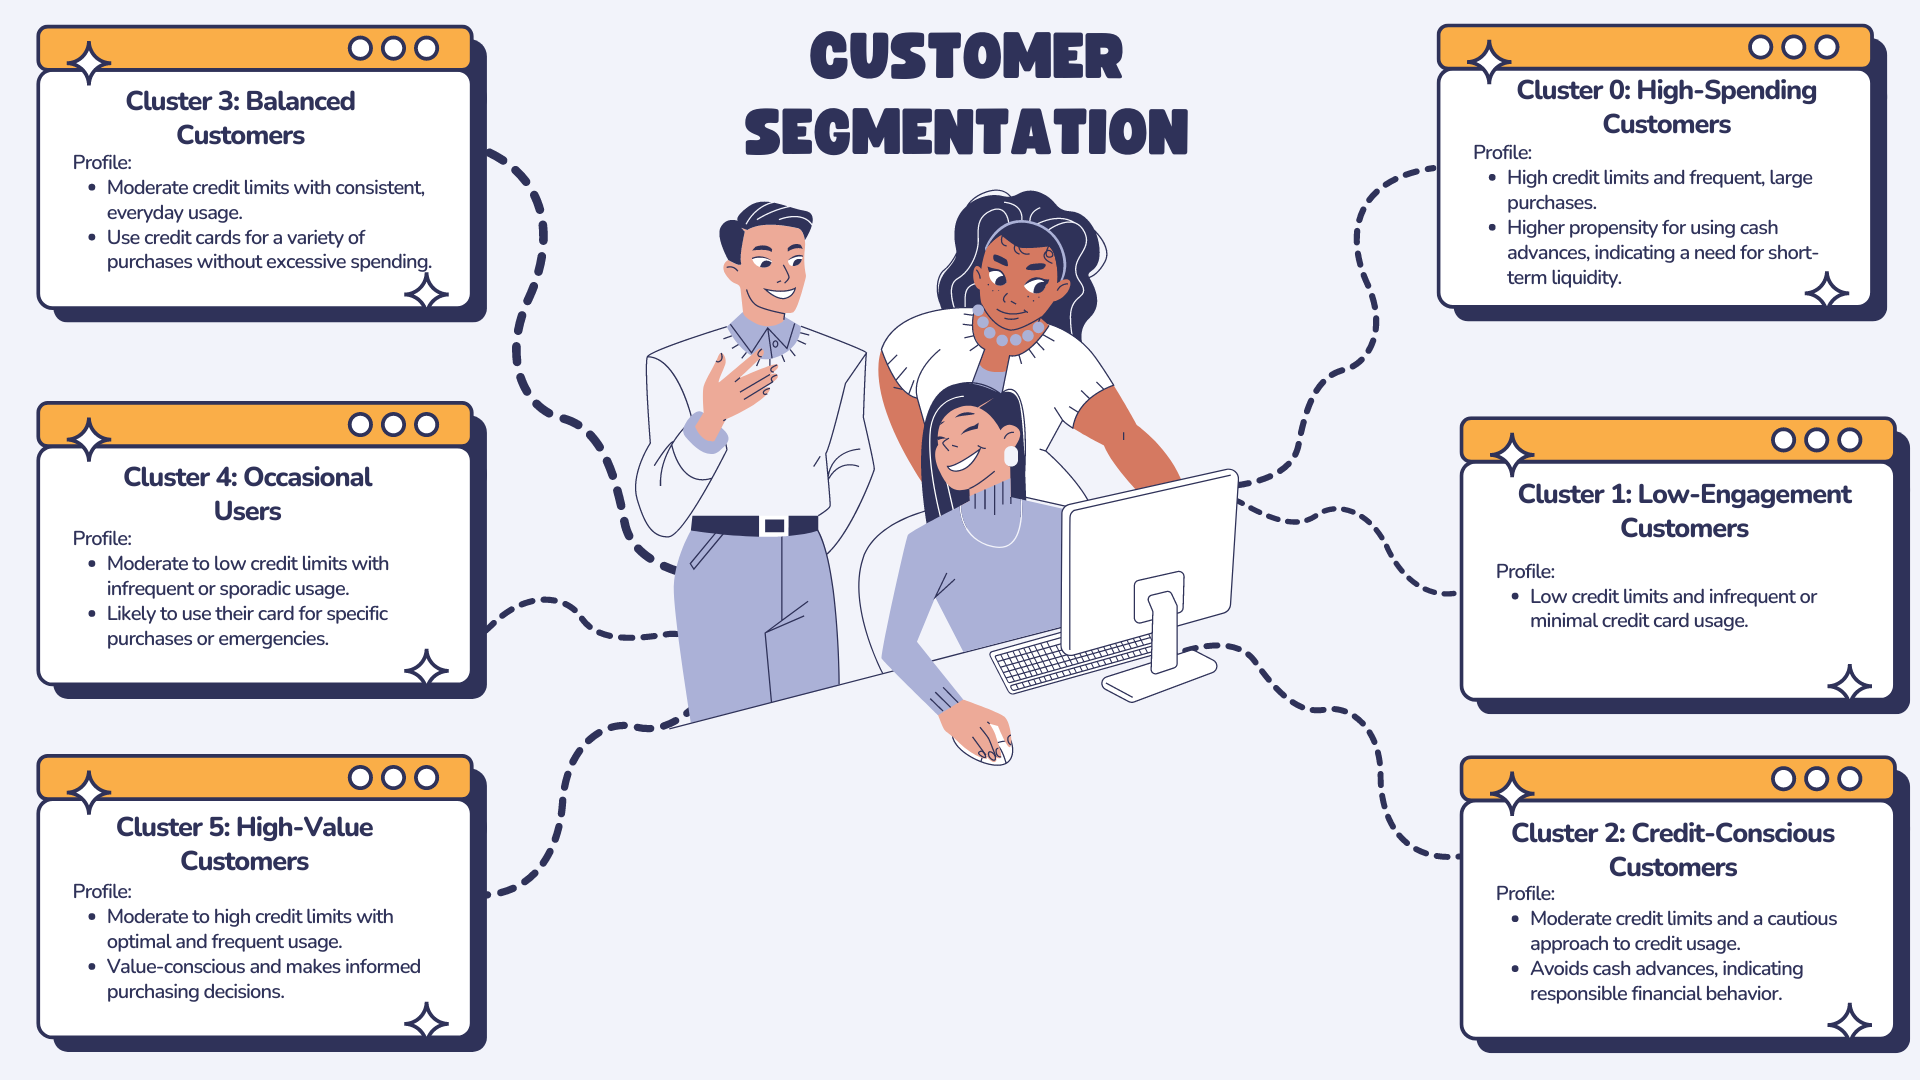